# Iris Flower Classification

## Imports

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [158]:
from sklearn.feature_selection import mutual_info_classif

In [159]:
from sklearn.metrics import (
    classification_report, f1_score, accuracy_score, confusion_matrix, 
    precision_score, recall_score, ConfusionMatrixDisplay
)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [161]:
%matplotlib inline

## Loads and Processes

In [162]:
data = pd.read_csv('data//Iris.csv', index_col='Id')

In [163]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [164]:
df = data.copy()

In [165]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [166]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [167]:
# Reduce memory usage
df[df.select_dtypes('float64').columns] = df.select_dtypes('float64').astype('float16')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float16
 1   SepalWidthCm   150 non-null    float16
 2   PetalLengthCm  150 non-null    float16
 3   PetalWidthCm   150 non-null    float16
 4   Species        150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 3.5+ KB


In [169]:
df.Species = df.Species.apply(lambda s: s.split('-')[-1])

In [170]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.101562,3.500000,1.400391,0.199951,setosa
2,4.898438,3.000000,1.400391,0.199951,setosa
3,4.699219,3.199219,1.299805,0.199951,setosa
4,4.601562,3.099609,1.500000,0.199951,setosa
5,5.000000,3.599609,1.400391,0.199951,setosa


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float16
 1   SepalWidthCm   150 non-null    float16
 2   PetalLengthCm  150 non-null    float16
 3   PetalWidthCm   150 non-null    float16
 4   Species        150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 3.5+ KB


In [172]:
df.columns = ['SL', 'SW', 'PL', 'PW', 'species']

In [173]:
df.head()

,SL,SW,PL,PW,species
Id,,,,,
1,5.101562,3.500000,1.400391,0.199951,setosa
2,4.898438,3.000000,1.400391,0.199951,setosa
3,4.699219,3.199219,1.299805,0.199951,setosa
4,4.601562,3.099609,1.500000,0.199951,setosa
5,5.000000,3.599609,1.400391,0.199951,setosa


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float16
 1   SW       150 non-null    float16
 2   PL       150 non-null    float16
 3   PW       150 non-null    float16
 4   species  150 non-null    object 
dtypes: float16(4), object(1)
memory usage: 3.5+ KB


## EDA - Exploratory Data Analysis

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843750,0.828125,4.300781,5.101562,5.800781,6.398438,7.898438
SW,150.0,3.052734,0.433594,2.000000,2.800781,3.000000,3.300781,4.398438
PL,150.0,3.759766,1.764648,1.000000,1.599609,4.349609,5.101562,6.898438
PW,150.0,1.198242,0.763184,0.099976,0.300049,1.299805,1.799805,2.500000


In [176]:
df.groupby(by='species').mean()

,SL,SW,PL,PW
species,,,,
setosa,5.006016,3.418008,1.464043,0.243965
versicolor,5.936094,2.770039,4.260000,1.325977
virginica,6.587734,2.974023,5.552266,2.026055


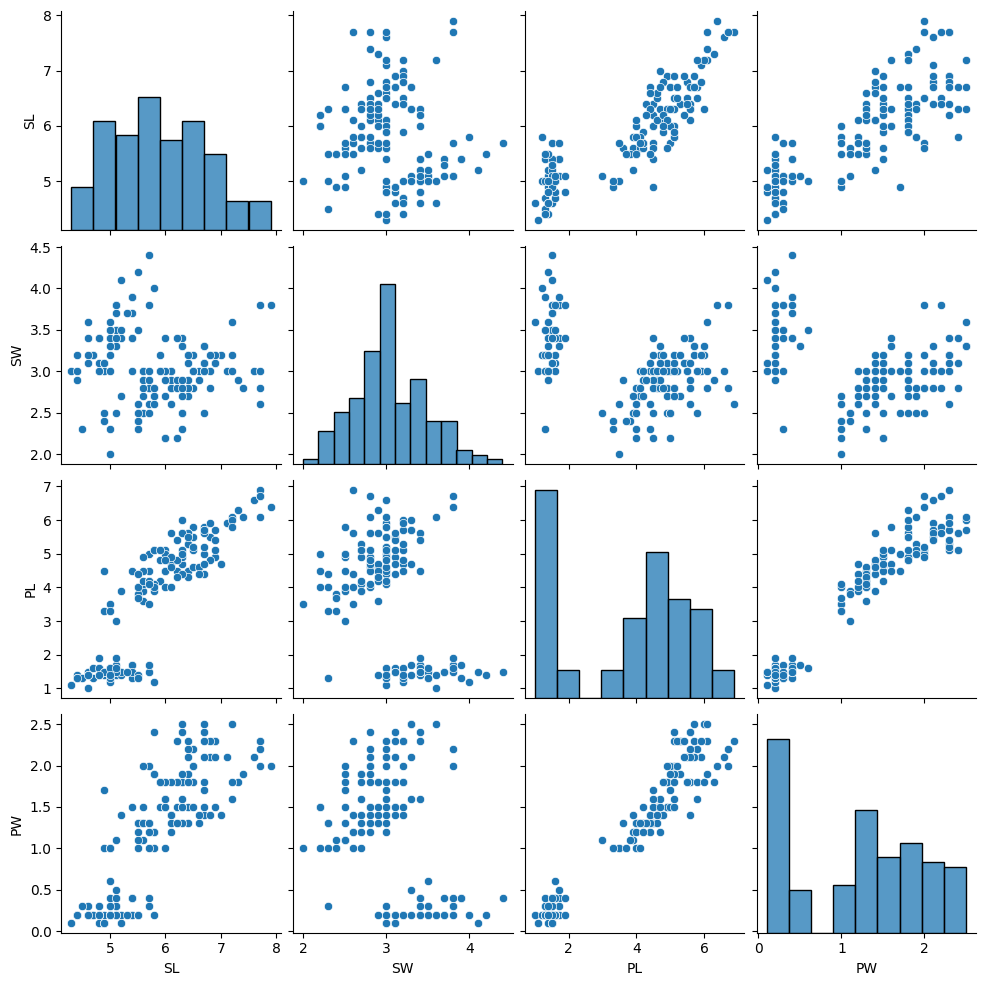

In [177]:
sns.pairplot(df)

<AxesSubplot: >

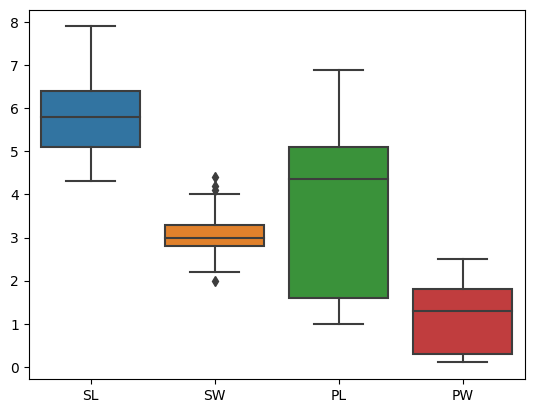

In [178]:
sns.boxplot(data=df)

In [179]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Tranformation

In [180]:
encoder = LabelEncoder()
df.species = encoder.fit_transform(df.species)

In [181]:
df.head()

,SL,SW,PL,PW,species
Id,,,,,
1,5.101562,3.500000,1.400391,0.199951,0
2,4.898438,3.000000,1.400391,0.199951,0
3,4.699219,3.199219,1.299805,0.199951,0
4,4.601562,3.099609,1.500000,0.199951,0
5,5.000000,3.599609,1.400391,0.199951,0


## Data Split

In [182]:
xtrain, xtest, ytrain, ytest = train_test_split(
    df.drop(columns=['species']), df.species, random_state=33, test_size=0.2
)

## Feature Selection

In [183]:
scores = mutual_info_classif(df.drop(columns=['species']), df.species)
scores

array([0.49983728, 0.20640964, 0.99317596, 0.98900718])

## Logistic Regression

In [184]:
logistic_model = LogisticRegression()

In [185]:
logistic_model.fit(xtrain, ytrain)

LogisticRegression()

In [186]:
ypred = logistic_model.predict(xtest)
accuracy_score(ypred, ytest)

0.9333333333333333

In [187]:
f1_score(y_pred=ypred, y_true=ytest, average='weighted')

0.9344729344729344

In [188]:
cm = confusion_matrix(y_pred=ypred, y_true=ytest)

In [189]:
report1 = classification_report(ypred, ytest)

In [190]:
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.80      0.89        10
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



In [191]:
classification_report(ypred, ytest, output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8},
 '1': {'precision': 1.0,
  'recall': 0.8,
  'f1-score': 0.888888888888889,
  'support': 10},
 '2': {'precision': 0.8571428571428571,
  'recall': 1.0,
  'f1-score': 0.923076923076923,
  'support': 12},
 'accuracy': 0.9333333333333333,
 'macro avg': {'precision': 0.9523809523809524,
  'recall': 0.9333333333333332,
  'f1-score': 0.9373219373219372,
  'support': 30},
 'weighted avg': {'precision': 0.9428571428571428,
  'recall': 0.9333333333333333,
  'f1-score': 0.9321937321937322,
  'support': 30}}

In [192]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sentosa', 'Versicolor', 'Virginica'])

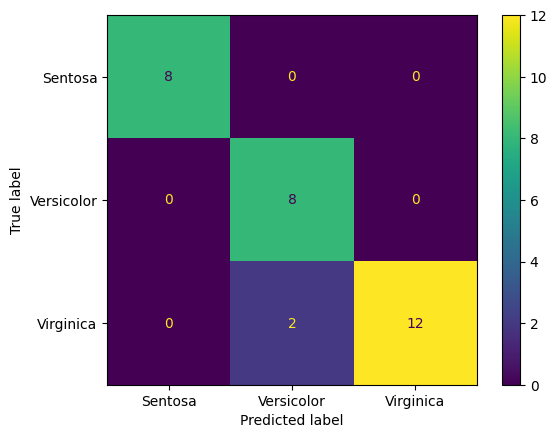

In [193]:
cmd.plot()

In [194]:
model = LogisticRegression(penalty='l2', max_iter=1000)
cv = cross_val_score(model, df.drop(columns=['species']), df.species, scoring='accuracy', cv = 5)
cv

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [195]:
cv.mean()

0.9733333333333334

## KNN

In [196]:
knn_model = KNeighborsClassifier()

In [197]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## Hyperparameter Tuning

In [198]:
grid = GridSearchCV(
    knn_model,
    param_grid={
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'metric': ['minkowski', 'euclidean', 'manhattan'],
        'n_neighbors': np.arange(5, 25, 3),
        'weights': ['uniform', 'distance']
    },
    cv=5,
    scoring='accuracy', 
    verbose=True
)

In [199]:
grid.fit(df.drop(columns=['species']), df.species)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 5,  8, 11, 14, 17, 20, 23]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [200]:
grid.best_params_

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 8,
 'weights': 'distance'}

In [201]:
grid.best_score_

0.9866666666666667

In [202]:
best_model = grid.best_estimator_
best_model

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, weights='distance')

## Classifier Vizualization

In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843750,0.828125,4.300781,5.101562,5.800781,6.398438,7.898438
SW,150.0,3.052734,0.433594,2.000000,2.800781,3.000000,3.300781,4.398438
PL,150.0,3.759766,1.764648,1.000000,1.599609,4.349609,5.101562,6.898438
PW,150.0,1.198242,0.763184,0.099976,0.300049,1.299805,1.799805,2.500000
species,150.0,1.000000,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


In [204]:
model3 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, weights='distance')

In [205]:
model3.fit(df[['PL', 'PW']], df.species)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, weights='distance')

In [206]:
x1, x2 = np.meshgrid(
    np.arange(1.0, 7.0, 0.01),
    np.arange(0.09, 2.60, 0.01)
)

In [207]:
x1

array([[1.  , 1.01, 1.02, ..., 6.97, 6.98, 6.99],
       [1.  , 1.01, 1.02, ..., 6.97, 6.98, 6.99],
       [1.  , 1.01, 1.02, ..., 6.97, 6.98, 6.99],
       ...,
       [1.  , 1.01, 1.02, ..., 6.97, 6.98, 6.99],
       [1.  , 1.01, 1.02, ..., 6.97, 6.98, 6.99],
       [1.  , 1.01, 1.02, ..., 6.97, 6.98, 6.99]])

In [208]:
x2

array([[0.09, 0.09, 0.09, ..., 0.09, 0.09, 0.09],
       [0.1 , 0.1 , 0.1 , ..., 0.1 , 0.1 , 0.1 ],
       [0.11, 0.11, 0.11, ..., 0.11, 0.11, 0.11],
       ...,
       [2.58, 2.58, 2.58, ..., 2.58, 2.58, 2.58],
       [2.59, 2.59, 2.59, ..., 2.59, 2.59, 2.59],
       [2.6 , 2.6 , 2.6 , ..., 2.6 , 2.6 , 2.6 ]])

In [209]:
features = np.c_[x1.flatten(), x2.flatten()]

In [210]:
yy = model3.predict(features)

d:\Programming\Python\MLDS_1020\.env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [211]:
yy

array([0, 0, 0, ..., 2, 2, 2])

In [212]:
ypredGrid = yy.reshape(x1.shape)
ypredGrid

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

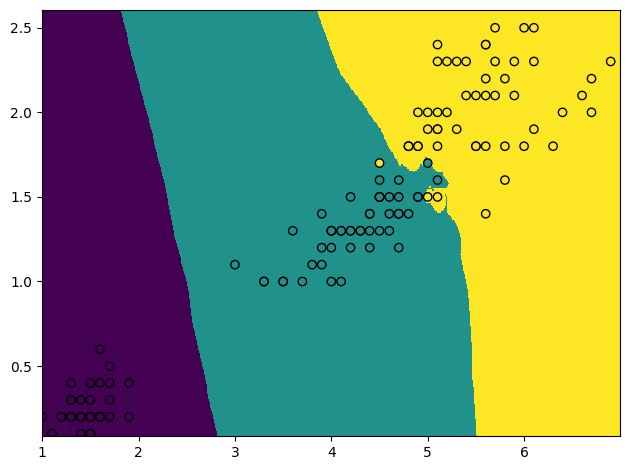

In [213]:
plt.figure()
plt.pcolormesh(x1, x2, ypredGrid)
plt.scatter(df.PL, df.PW, c=df.species, edgecolors='black')
plt.tight_layout()
plt.show()

d:\Programming\Python\MLDS_1020\.env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


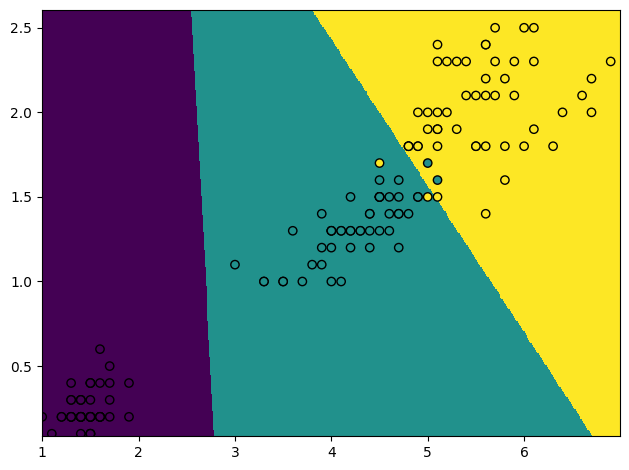

In [214]:
plt.figure()
logistic_model = LogisticRegression()
logistic_model.fit(df[['PL', 'PW']], df.species)
yy = logistic_model.predict(features).reshape(x1.shape)
plt.pcolormesh(x1, x2, yy)
plt.scatter(df.PL, df.PW, c=df.species, edgecolors='black')
plt.tight_layout()
plt.show()